# **AP155 Lab Assignment**
## Module 3: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name: Noche, Filomeno III \
_Student No._: 2019-07659\
_Section_: THV-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Filomeno III A. Noche**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/30
* Problem 2 - []/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(15 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(15 pts.)*


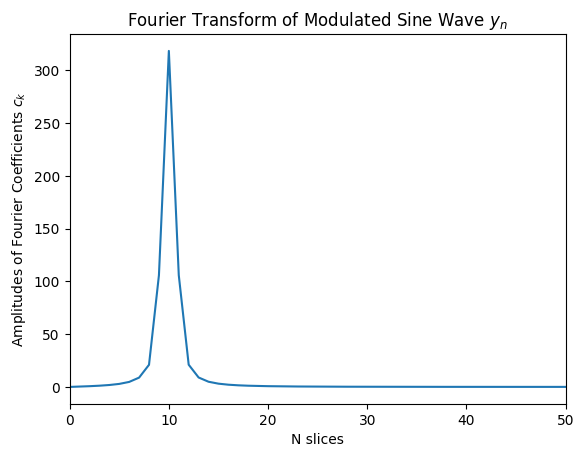

318.5089544870544  :  10


In [20]:
from numpy import zeros,size
from cmath import exp,pi,sin


N=1000 #no. of slices
xaxis=[] #lists for plot
caxis=[] #list for coefficents
def y(n,N):
  return sin(pi*n/N)*sin(20*pi*n/N)
c=zeros(N//2+1,complex) # N/2+1 no. of complex conjugates coefficients for even N
for k in range(N//2+1): #for loop for DFT caluclation
  for n in range(N):
    c[k]+=y(n,N)*exp(-2j*pi*k*n/N) #forawrd DFT
  xaxis.append(k) #index is appended to x-axis list
  caxis.append(abs(c[k])) #coefficient appended to y-axis list.
import matplotlib.pyplot as plt
plt.plot(xaxis, caxis)
plt.title("Fourier Transform of Modulated Sine Wave $y_n$")
plt.xlabel("N slices")
plt.ylabel("Fourier Coefficients $c_k$")
plt.xlim(0,50) #x-axis limited to 50 slices to show the spike in the graph.
plt.show()
print(max(caxis)," : ",caxis.index(max(caxis)))



Graph shows the Fourier Transform of the Modulated Sine Wave equation with a peak at 10 slices which signify the maximum amplitude of the Sine Wave equation. The rest of the slices are numbered 0.

### PROBLEM 2

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the Course Pack > Datasets folder).

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(10 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(20 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(10 pts.)*

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(30 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [22]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [23]:
!ls drive/My\ Drive/

 05.04.2024-Ad-Hoc-Heads-Meeting-1.pdf
 1Q99F4YrH7bTZ58eE2YMA8Jj39tqBnbiE
 273209268_511508943728154_6455285806217702335_n.jpg
 301194603_374475848221371_1855652405751946663_n.jpg
'3. EDSC 106 Calendar (2nd sem) - with Course Requirements.pdf'
 407081371_901169698089157_8152547274006886931_n.jpg
 437045260_957340162764172_8498821492624537624_n.jpg
 456481422_1189593338753237_6583475974645034509_n.jpg
'6. 5Es Instructional Plan Activity (1).pdf'
'6. 5Es Instructional Plan Activity.pdf'
" 'Abstract.doc'"
'Active Readings for EDSC 102.gdoc'
'Activity 2 EDCS 101.gdoc'
'Activity 2: Matrix of the Models of Disability - Line chart 1.gsheet'
"Activity 3B: Individual Analysis of Schools' Educational Philosophy.gdoc"
'Activity 4 essays.gdoc'
'answer key edre 146.gdoc'
'Answer Key.gdoc'
'AP155LE1 Reviewer.gdoc'
'Appeal for Late Registration for University Chancellor.gdoc'
'Appeal for Late Registration for University Registrar.gdoc'
'Appeal for Late Registration for University Registrar_Noche.pdf'

Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [24]:
file_path = "/content/drive/My Drive/Colab Notebooks/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [25]:
import numpy as np
dow = np.loadtxt(file_path+"dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
```

In [26]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

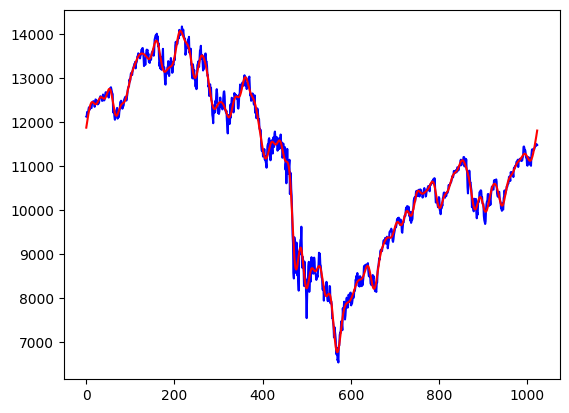

In [28]:
#Plot the data on a graph. (10 pts.)
xaxis=[i for i in range(len(dow))] #x-axis for the plot
import matplotlib.pyplot as plt
plt.plot(xaxis, dow,"b") #plot of dow.txt
#Calculate the coefficients of the discrete Fourier transform of the data using the function  rfft  from numpy's  fft  library, which produces an array of  12N+1  complex numbers. (20 pts.)
import numpy as np
from numpy.fft import rfft, irfft
fast=rfft(dow) #real fast fourier transform of dow
#Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). (10 pts.)
for i in range(len(fast)-len(fast)//10): #range is the number of the 90% of the array fast.
  fast[-i-1]=0 #90% of the array are converted to 0 starting from the last item.
#Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function  irfft , and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? (30 pts.)
ir=irfft(fast) #inverse fourier transform of array fast.
plt.plot(xaxis,ir,"r") #plot of inverse fourier transformed array fast.
plt.show()

Table shows graphs of the raw array from dow.txt (in blue) and the same array but Fourier transformed and inverse Fourier transformed back (in red). It shows that the red graph appears to be smoother than the blue graph because Fourier Transform (and Inverse) is used to clean out the 'noise' from the raw data.